#  Objective
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# Attribute information
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

1. A 561-feature vector with time and frequency domain variables.

2. Its activity label.

3. An identifier of the subject who carried out the experiment.

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
train_df =pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
train.shape

(7352, 563)

In [6]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Importing Data

In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [9]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [0]:
train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,0.27688,0.276228,0.278457,0.277175,0.297946,0.279203,0.279038,0.280135,0.277731,0.275568,0.277562,0.277152,0.275676,0.2792,0.281715,0.278993,0.275734,0.144504,0.287252,0.279998,0.221847,-0.0417013,0.0139037,0.303689,0.29076,0.270908,0.279553,0.276359,0.237154,0.273108,...,0.379892,0.276135,0.306786,0.410121,0.229752,0.188175,0.33579,0.185303,0.352242,-0.0132145,0.121814,0.328389,0.390039,0.346577,0.282866,0.1985,0.205437,-0.0295952,0.242789,0.381254,0.388719,0.315171,0.20574,0.201809,0.18358,0.39107,0.198992,0.158101,0.281287,0.41801,0.428925,0.292996,0.276552,0.271818,0.275229,0.279222,0.276892,0.278116,0.274745,0.276491
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,-0.0127218,-0.0214413,-0.0204148,-0.0147128,0.0270939,-0.0230201,-0.0148004,-0.013917,-0.0182107,-0.0169797,-0.0143185,-0.0179833,-0.0212642,-0.0177144,-0.0119107,-0.014531,-0.0180188,0.189263,-0.0374551,-0.019484,0.0341077,0.175102,0.153296,-0.00424281,-0.0240348,-0.014413,-0.0170011,-0.0161381,0.00782512,0.00651811,...,-0.0143518,0.00182654,0.099755,0.0132747,-0.0510092,-0.0335648,-0.0390231,0.00877638,0.0273333,-0.155099,0.0129839,0.0102513,-0.0205479,-0.0320937,-0.0257412,0.0122833,0.000827894,-0.137717,0.0158066,-0.0379756,-0.024347,-0.0259332,-0.0458296,0.00853704,-0.127213,-0.0212018,-0.0024547,-0.0404739,-0.0348025,-0.0165771,-0.0375677,-0.0367458,-0.0285119,-0.0322743,-0.0109663,-0.00579458,-0.0187113,-0.0198451,-0.0139833,-0.0169387
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,-0.103438,-0.108202,-0.112732,-0.106756,-0.0616681,-0.12208,-0.116849,-0.10637,-0.109188,-0.111429,-0.107877,-0.106601,-0.110801,-0.109161,-0.102875,-0.106596,-0.106776,0.0627693,-0.145974,-0.105724,-0.123612,0.0255518,0.0162429,-0.15085,-0.116739,-0.106522,-0.110517,-0.108033,-0.122838,-0.109472,...,-0.142958,-0.0454149,-0.101771,-0.168984,-0.0934395,-0.0977917,-0.12733,-0.091583,-0.0655689,-0.0929298,-0.0548949,-0.0912826,-0.10311,-0.0721226,-0.0934975,-0.157761,-0.136915,-0.122782,-0.0570392,-0.0759459,-0.118772,-0.09448,-0.118908,-0.145688,-0.0534178,-0.0897507,-0.117281,-0.13475,-0.0893525,-0.153921,-0.16947,-0.111782,-0.110449,-0.113994,-0.0899992,-0.0924358,-0.109727,-0.110447,-0.0964446,-0.110932
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,-0.994815,-0.998246,-0.999135,-0.999188,-0.988641,-0.996839,-0.996941,-0.997695,-0.997491,-0.997811,-0.997904,-0.997763,-0.997862,-0.998389,-0.998534,-0.99806,-0.999255,-0.9043,-0.982915,-0.992818,-0.814708,-0.758393,-0.808638,-0.956503,-0.977374,-0.993856,-0.996076,-0.995577,-0.979954,-0.990783,...,0.355264,0.413986,0.44354,0.378736,0.343826,0.344664,0.326518,0.264677,0.298492,0.0910973,0.140315,0.104501,0.0369851,-0.00396253,-0.0570514,-0.0687198,-0.0809618,0.0360945,-0.0549408,0.0233586,0.00602029,-0.0114877,0.0245641,-0.0550785,0.0663695,0.0703425,0.100775,0.063741,-0.0645753,-0.0471406,-0.0337468,-0.953571,-0.98756,-0.995988,-0.995814,-0.996173,-0.994897,-0.993512,-0.993281,-0.994215
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,-0.973077,-0.987214,-0.98468,-0.990526,-0.816699,-0.974848,-0.981866,-0.987516,-0.993222,-0.990522,-0.994311,-0.989957,-0.990091,-0.987308,-0.988489,-0.98607,-0.993669,-0.181937,-0.891605,-0.94035,-0.749418,-0.586537,-0.572746,-0.838672,-0.963841,-0.993179,-0.995782,-0.994544,-0.866193,-0.935065,...,0.281737,0.114354,0.137728,0.358842,0.386119,0

In [81]:
train.shape,test.shape

((7352, 563), (2947, 563))

In [14]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())

Train labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS'] 
Test Labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [10]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [0]:
# separating data inputs and output lables 
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

# Exploratory Data Analysis

# Data :

Out of all 563 fetures of our dataset, Activity and Subject are categorical and the other 561 features are continuous. Just by looking at the dataset we can say that 'subject' is not a relevant feature for predicting the Activity. Subjects are the people who have undertaken the experiment for capturing our dataset and each one of 30 subjects have performed the same six activities. Lets visualize the distribution of activity performed by the subjects for all 6 activities to see to see if there is a relation between subject feature and the activity feature.

# Data Cleaning
# 1. Check for Duplicates

In [12]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


# 2. Checking for NaN/null values

In [13]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


# Checking for missing values

The very first exploratry analysis that we want to see if our training data has some missing values. we have generated a heat map where we would get to know by color marks that which feature has missing values in them. It looks like the data set has no missing values and we are good to go with furthur analysis.

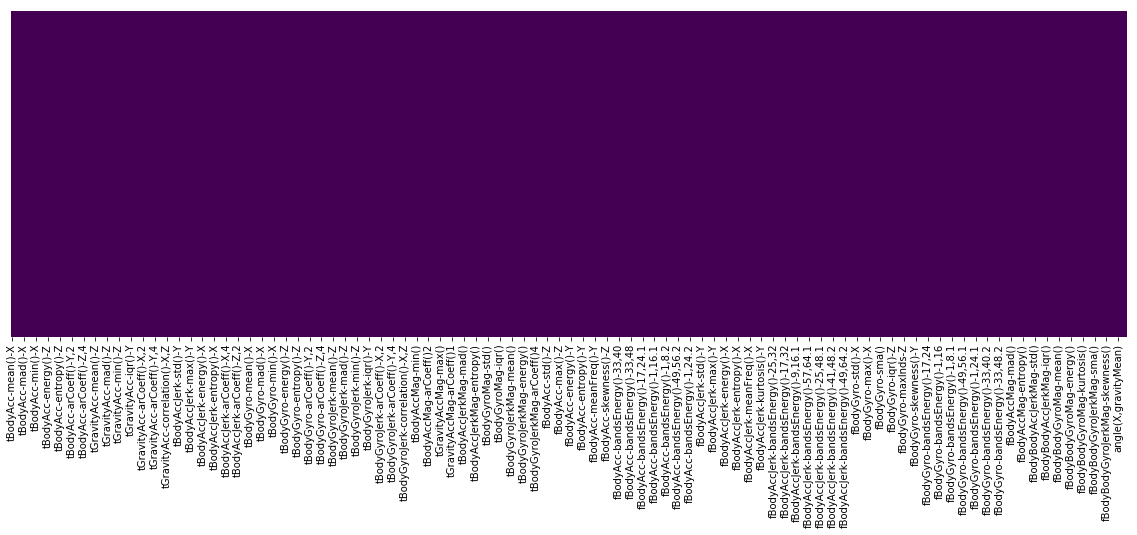

In [14]:
plt.figure(figsize=(20,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 3. Check for data imbalance

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

#Data points for each activity

In [0]:
train.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

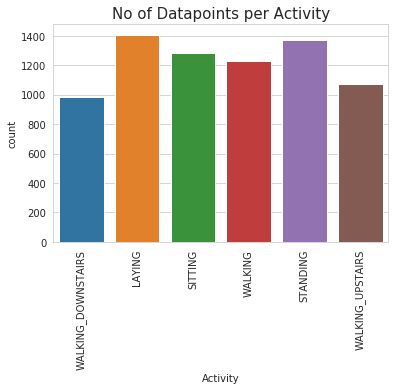

In [28]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity)
plt.xticks(rotation=90)


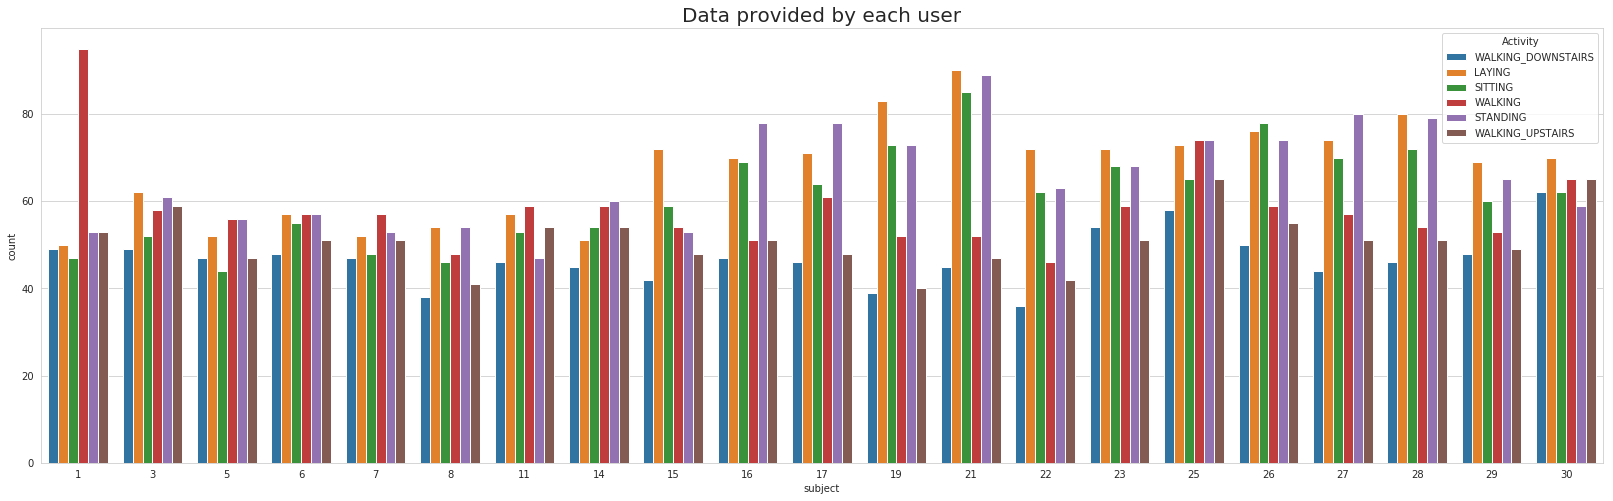

In [32]:
plt.figure(figsize=(28,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)


In [34]:
test.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

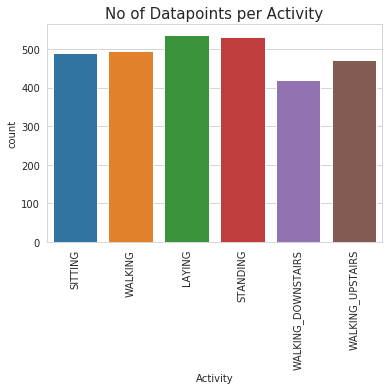

In [35]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(test.Activity)
plt.xticks(rotation=90)
plt.show()

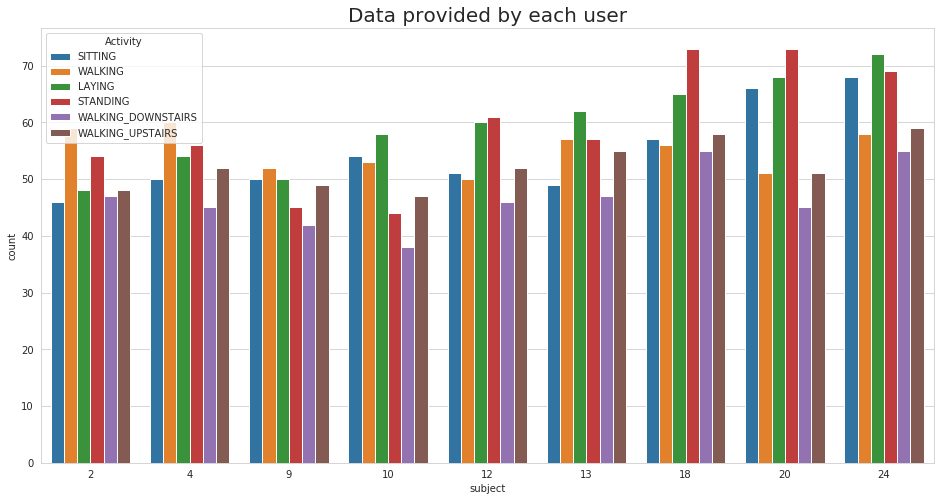

In [36]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = test)
plt.show()

We have got almost same number of reading from all the subjects  .                
Distribution of classes is balanced per train and test set and also  per subject.

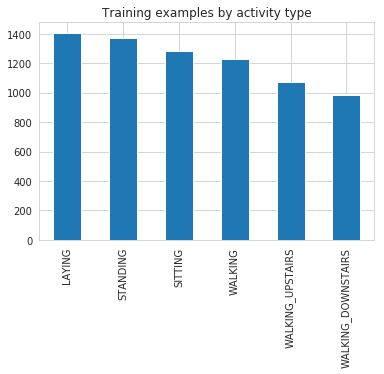

In [37]:
train.Activity.value_counts().plot(kind='bar', title='Training examples by activity type')

# Static and Dynamic Activities

In static activities (sit, stand, lie down) motion information will not be very useful.                  
In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

In [0]:
for i in train.columns:
    print(i)

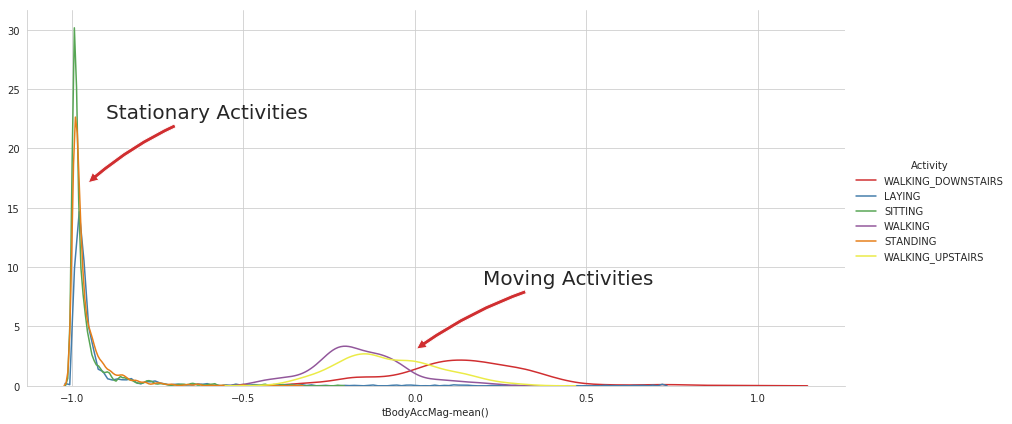

In [38]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,va='center', ha='left',
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

# Feature visualization

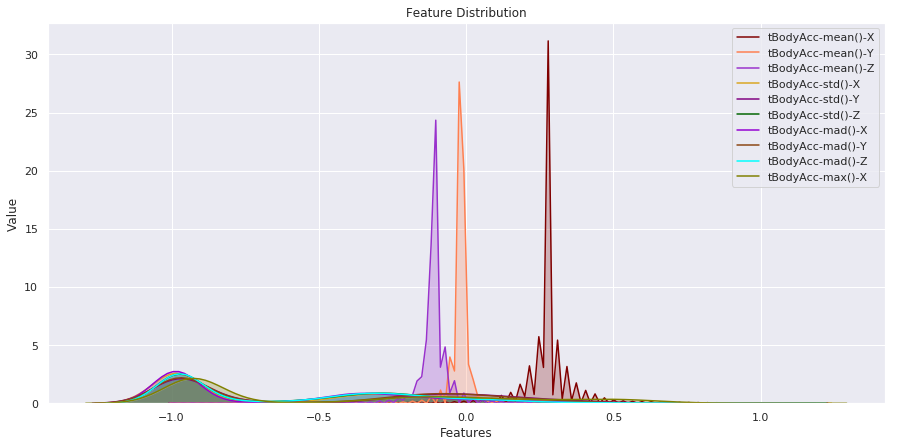

In [39]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

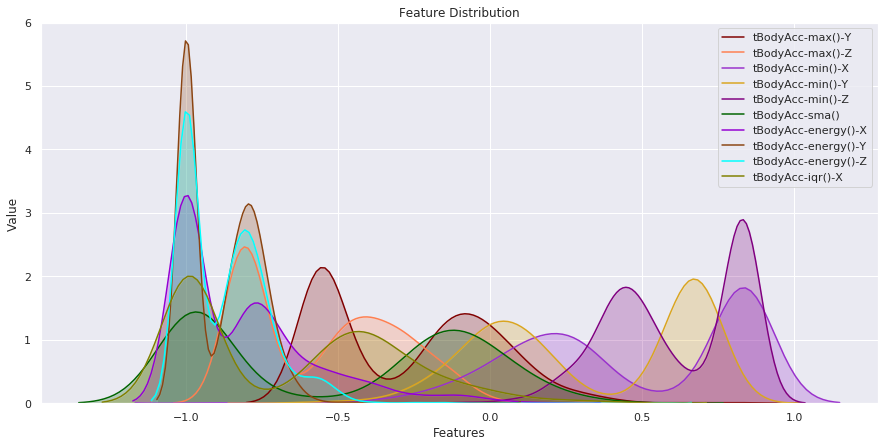

In [0]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

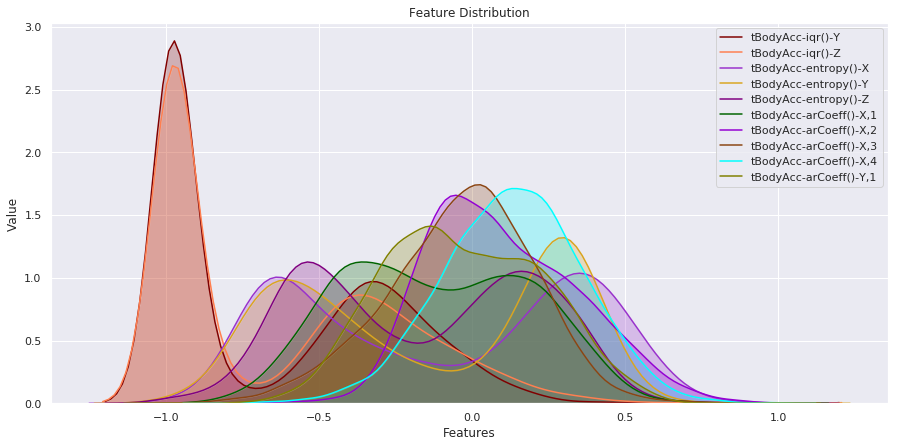

In [40]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

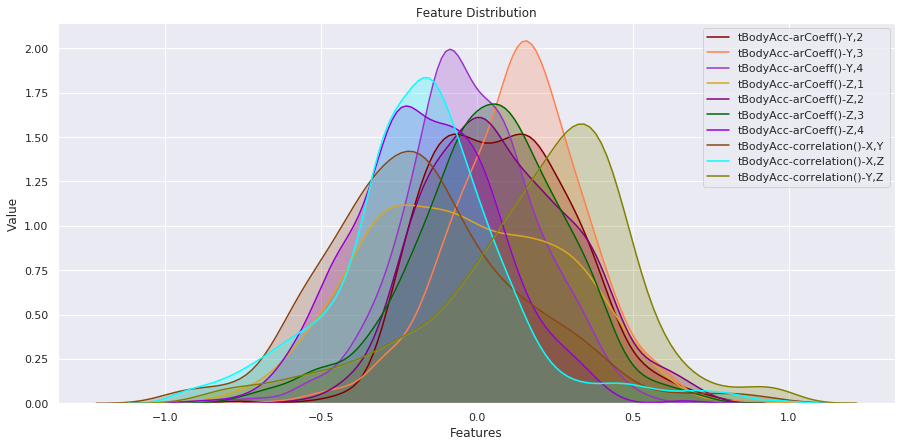

In [0]:

sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

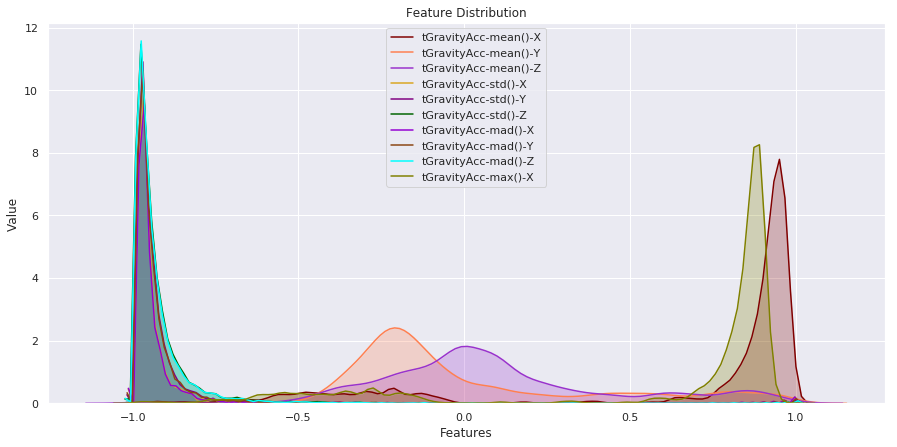

In [41]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in train.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(train[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

# Magnitude of an acceleration can saperate the classes well

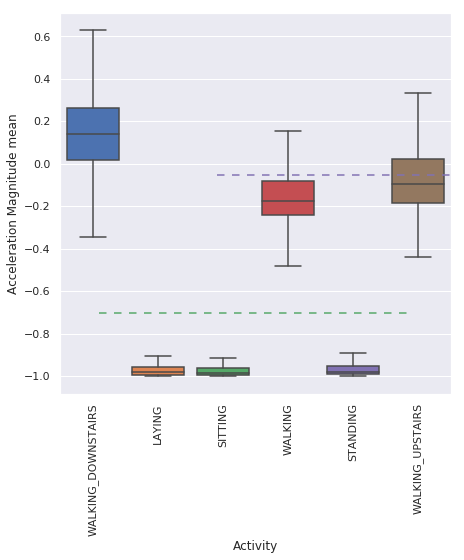

In [43]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

If tBodyAccMag-mean is < -0.8 then the Activities are either Standing or Sitting or Laying.             
If tBodyAccMag-mean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tBodyAccMag-mean > 0.0 then the Activity is WalkingDownstairs.                                                                        
We can classify 75% the Acitivity labels with some errors.

# Position of Gravity Acceleration Components

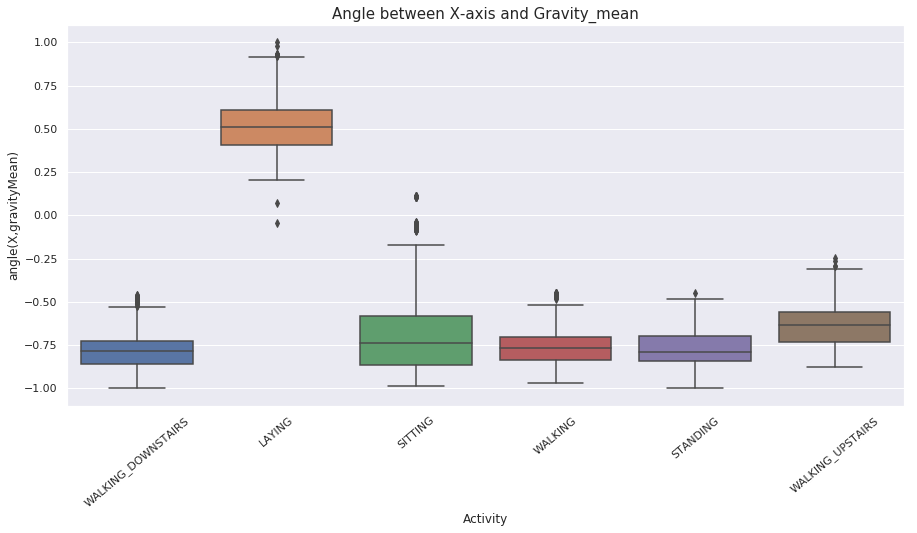

In [44]:

sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

If angleX,gravityMean > 0 then Activity is Laying.                                                       
We can classify all datapoints belonging to Laying activity with just a single if else statement.

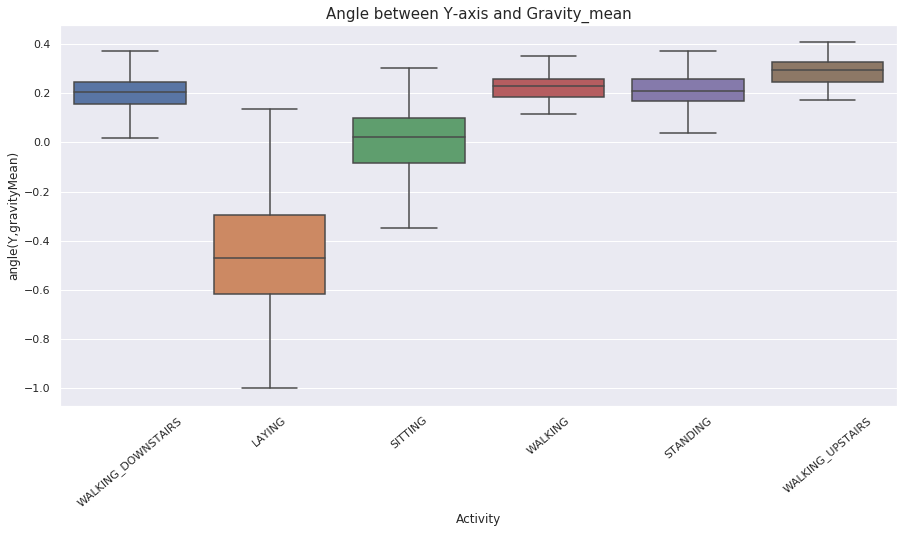

In [61]:
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

From the above visualization we can see that the Gravity Acceleration Component in X direction is more variable than in Y and Z direction. If we observe closely, for the active activities: WALKING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS the variation in X-axis more compared the passive activities: STANDING, SITTING and LAYING.

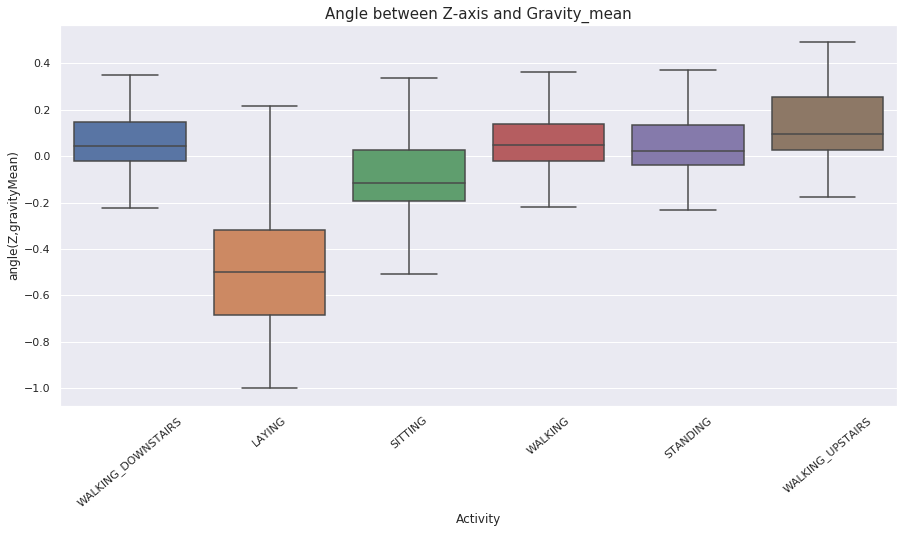

In [47]:
sns.boxplot(x='Activity', y='angle(Z,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Z-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

# Compare MaxBodyAcc in X Y Z direction

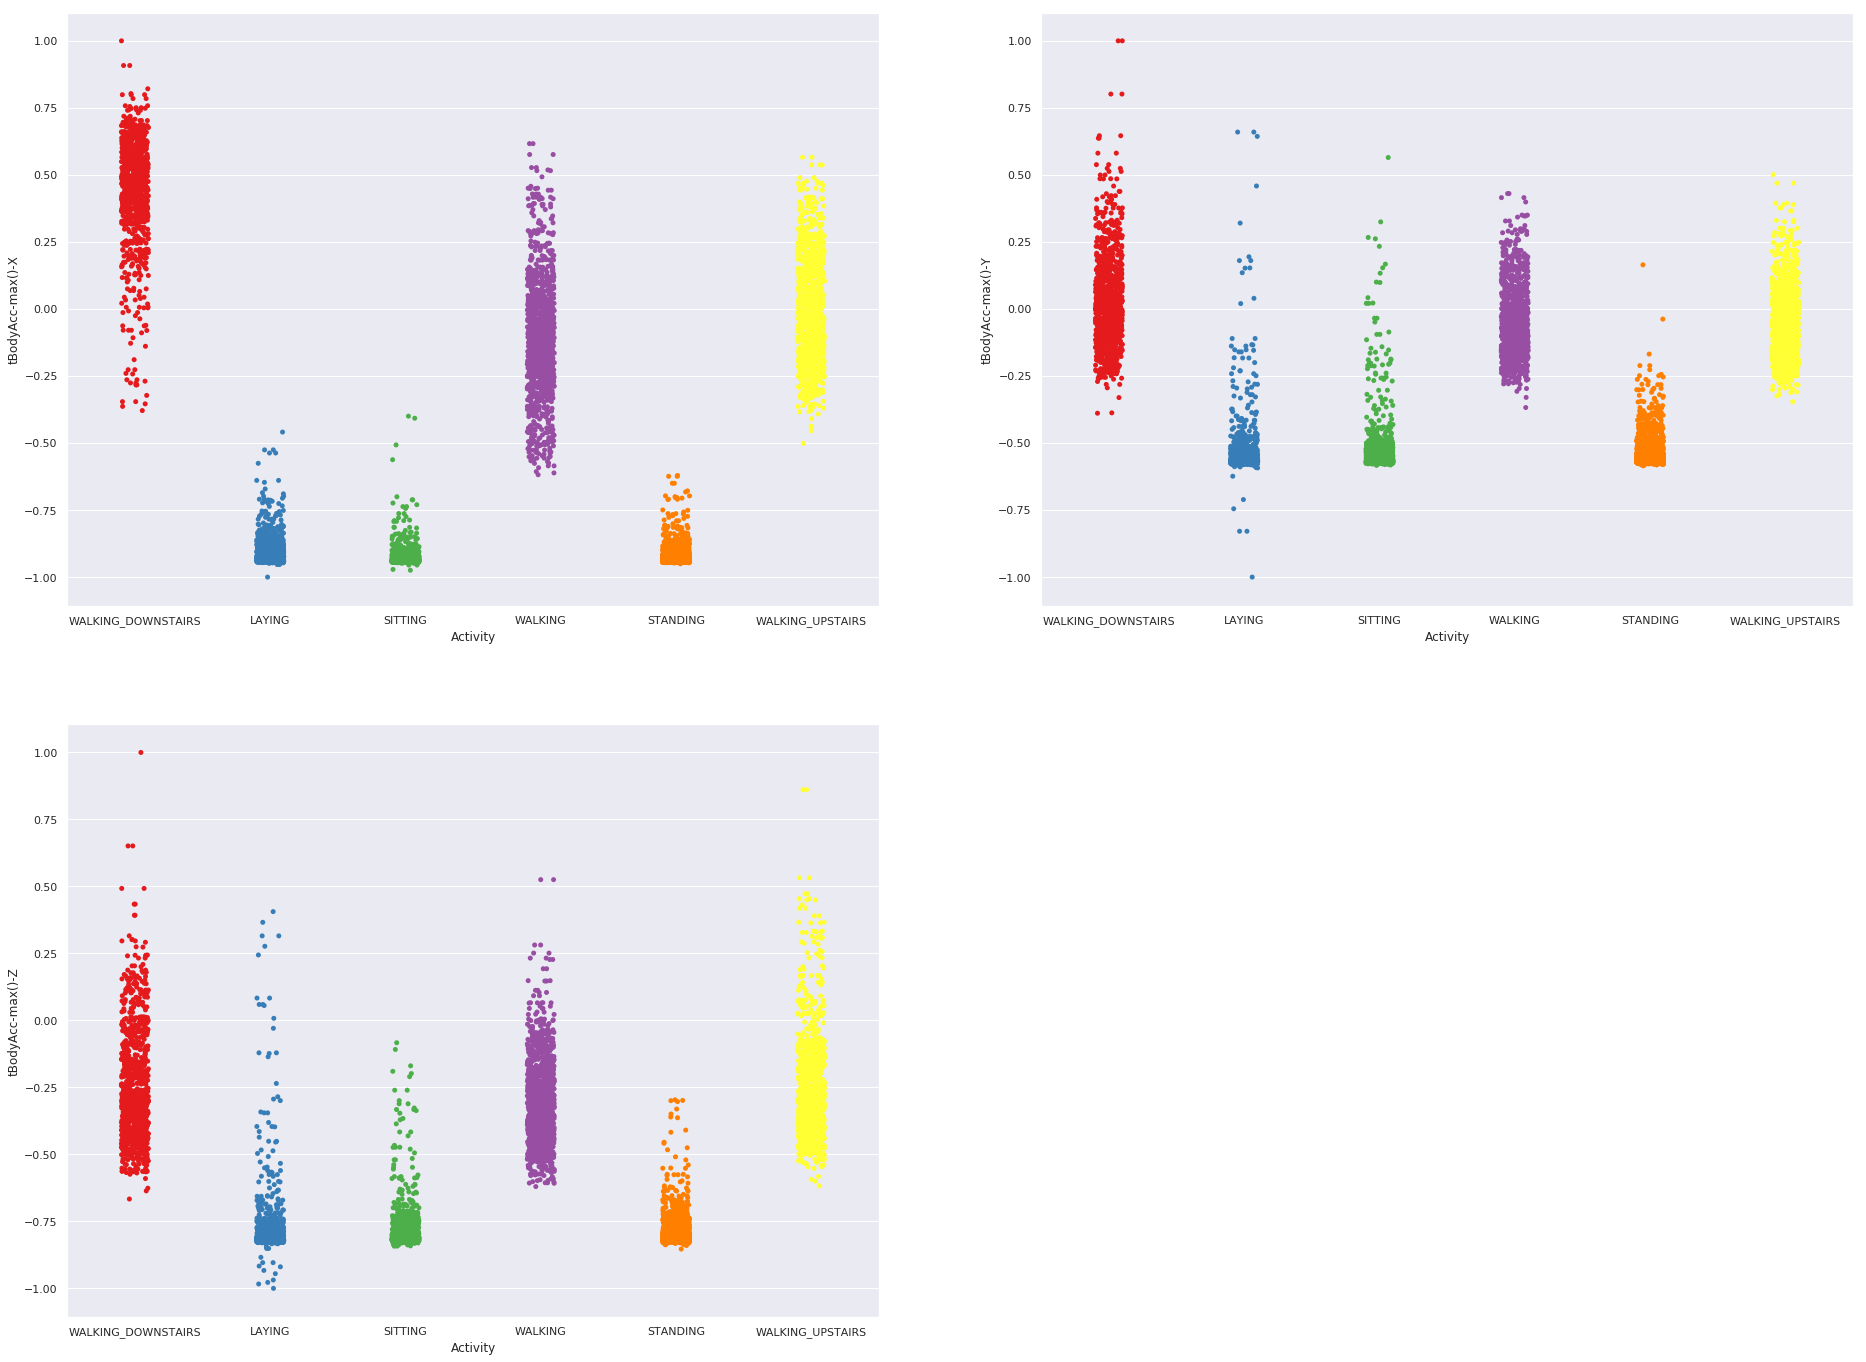

In [48]:
fig = plt.figure(figsize=(32,24))
ax_1 = fig.add_subplot(221)
ax_1 = sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=train, jitter=True, palette="Set1")
ax_2 = fig.add_subplot(222)
ax_2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=train, jitter=True, palette="Set1")
ax_2 = fig.add_subplot(223)
ax_2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Z', data=train, jitter=True, palette="Set1")
plt.show()

Comparing the above Strip-plot, we can clearly see that for Max Acc in all directions, the Passive activities are way below the active ones and for the active one the variation is also huge. If we notice in the first of the two plots, WALKING_DOWNSTAIRS has a greater value fo Max body accleration. This can be explained as when a person walks down stairs, his body moves comparatively faster compared to when he is steadily walking or Walking_upstairs.

In [0]:
# suffling data 
from sklearn.utils import shuffle

test  = shuffle(test)
train = shuffle(train)

From our dataset we can see that the 'Activity' feature is non-numeric. ML algorthms expect the input data to be numeric, so we shall convert the 'Activity' feature into something Numerical. Let us use 'Label Encoder' for this purpose.

LabelEncoder : Converts categorical data, or text data, into numbers, which the predictive models can better understand.
We encode both the train and test target variable.

In [0]:
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values


In [0]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
test_target = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
train_target = encoder.transform(trainLabel)

In [21]:
train_target

array([4, 0, 1, ..., 4, 3, 1])

The problem in question is a multi-class Classification problem. The input data consists 3-axial linear acceleration and 3-axial angular velocity readings from the gyroscope of a Samsung Galaxy S II at a constant rate of 50Hz accelerometer. The input data consists of 561 which we need to analyze and our goal is to predict if a user is doing any of the following activities: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING from their smartphone activity.
I will be approaching this as any other multi-class classification problem and after analyzing the dataset and doing all the needful pre-processing on the dataset.

In [0]:
# classification models:
# Decision tree
# SVM
# NN
# RF
# GBM
# DNN
# ANN
# DNN

In [0]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = train_df.drop("subject", axis=1)
test_df = test_df.drop("subject", axis=1)

train_values = train_df.values
test_values = test_df.values
np.random.shuffle(train_values)
np.random.shuffle(test_values)
X_train = train_values[:, :-1]
X_test = test_values[:, :-1]
y_train = train_values[:, -1]
y_test = test_values[:, -1]

In [83]:
y_train

array(['SITTING', 'WALKING_UPSTAIRS', 'WALKING', ...,
       'WALKING_DOWNSTAIRS', 'STANDING', 'SITTING'], dtype=object)

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, log_loss


In [0]:
def metric_report(y_t,y_p):
    print("Classification Report")
    print(classification_report(y_t,y_p))
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))
    print("Accuracy Score = {}".format(accuracy_score(y_t,y_p)))

In [0]:
def plot_roc_curve(yt,yp):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yt,yp)
    #false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(yt,yp,pos_label=2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    
    #print("false positive rate = {}".format(false_positive_rate))
    #print("true positive rate = {}".format(true_positive_rate))
    plt.figure(figsize=(4,4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)


In [27]:
model = LogisticRegression(C=1.0,solver='liblinear')
model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.score(X_test, y_test)

0.8728728728728729

In [49]:
ypred = model.predict(X_test)
metric_report(y_test,ypred)



Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Confusion Matrix
[[537   0   0   0   0   0]
 [  0 432  55   0   0   4]
 [  0  13 517   2   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   4 407   9]
 [  0   0   0  23   0 448]]
Accuracy Score = 0.9619952494061758


# Principal Component Analysis (PCA) :                                                   
This technique extracts some amount of the features from the original dataset. These extracted features/variables are called Principal Components. The main motive behind this technique is to extract a low dimensional set of features from a high dimensional dataset. And it is more useful when we are dealing with 3 or high dimensional data.                

A principal component is a linear combination of the original variables.                
Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.    Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.                    
Third principal component tries to explain the variance which is not explained by the first two principal components and so on

In [0]:
# Scale features to be between -1 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca.fit(X_train) 
X_train = pca.transform(X_train) 
X_test = pca.transform(X_test)

model.fit(X_train, y_train) 
model.score(X_test, y_test) 

ypred = model.predict(X_test)
metric_report(y_test,ypred)
#plot_roc_curve(y_test,ypred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.95      0.86      0.90       491
          STANDING       0.86      0.96      0.91       532
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.99      0.93      0.96       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

Confusion Matrix
[[517   0  20   0   0   0]
 [  0 424  65   0   0   2]
 [  0  21 511   0   0   0]
 [  0   2   0 493   1   0]
 [  0   1   0   3 413   3]
 [  0   0   0  30   1 440]]
Accuracy Score = 0.9494401085850017


Text(0, 0.5, 'cumulative explained variance')

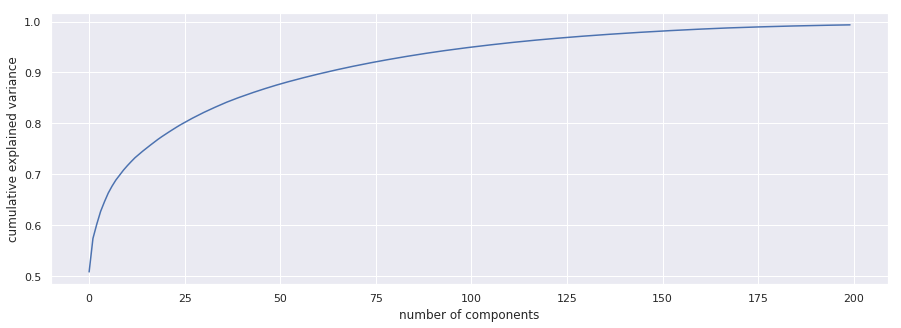

In [52]:
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ypred = model.predict(X_test)
metric_report(y_test,ypred)
#plot_roc_curve(y_test,ypred)

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.91      0.77      0.84       491
          STANDING       0.82      0.95      0.88       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.91      0.75      0.82       420
  WALKING_UPSTAIRS       0.91      0.93      0.92       471

          accuracy                           0.90      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.90      0.89      2947

Confusion Matrix
[[524  11   2   0   0   0]
 [  2 380 108   0   0   1]
 [  0  28 504   0   0   0]
 [  0   0   0 479  17   0]
 [  0   0   0  63 317  40]
 [  0   0   0  20  15 436]]
Accuracy Score = 0.8958262639972854


In [54]:
rf = RandomForestClassifier(n_estimators=200,  n_jobs=4, min_samples_leaf=10)    
rf.fit(trainData, train_target)

y_pred = rf.predict(testData)

acc = accuracy_score(test_target, y_pred)
print("Random Forest Accuracy: %.5f" % (acc))

metric_report(test_target,y_pred)
#plot_roc_curve(test_target,y_pred)

Random Forest Accuracy: 0.92026
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.88      0.90       491
           2       0.89      0.92      0.91       532
           3       0.87      0.97      0.92       496
           4       0.96      0.83      0.89       420
           5       0.89      0.89      0.89       471

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947

Confusion Matrix
[[537   0   0   0   0   0]
 [  0 432  59   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  25 349  46]
 [  0   0   0  44   6 421]]
Accuracy Score = 0.9202578893790295


0 : Laying

1 : Sitting

2 : Standing

3 : Walking

4 : Walking_Downstairs

5 : Walking_ Upstairs


# Knn

In [56]:
##### K-Nearest Neighbors ######
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=24)

knnModel = clf.fit(trainData , train_target)

ypred = clf.predict(testData)
metric_report(test_target,ypred)
#plot_roc_curve(test_target,ypred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       537
           1       0.80      0.71      0.76       491
           2       0.77      0.87      0.82       532
           3       0.68      0.90      0.78       496
           4       0.86      0.70      0.77       420
           5       0.84      0.71      0.77       471

    accuracy                           0.82      2947
   macro avg       0.83      0.81      0.81      2947
weighted avg       0.83      0.82      0.82      2947

Confusion Matrix
[[513  19   4   0   0   1]
 [  0 350 138   0   0   3]
 [  0  66 465   1   0   0]
 [  0   0   0 448  30  18]
 [  0   0   0  85 294  41]
 [  0   0   0 122  16 333]]
Accuracy Score = 0.8154054971157109


In [0]:
def knn_model(weight):
    knn_accuracy=[]
    k_value = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i, weights=weight)
        knn.fit(trainData , train_target)
        ypred = knn.predict(testData)
        temp = accuracy_score(test_target,ypred)
        k_value.append(i)
        knn_accuracy.append(temp)
        
    #print(max(knn_accuracy))
    k_optimum = k_value[np.argmax(knn_accuracy)]
    #print(k_optimum)
    ypred = knn.predict(testData)
    metric_report(test_target,ypred)
    #plot_roc_curve(test_target,ypred)
    return knn_accuracy



In [57]:
knn_distance = knn_model('distance')

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       537
           1       0.86      0.66      0.74       491
           2       0.74      0.92      0.82       532
           3       0.67      0.91      0.77       496
           4       0.87      0.66      0.75       420
           5       0.84      0.70      0.76       471

    accuracy                           0.81      2947
   macro avg       0.83      0.80      0.81      2947
weighted avg       0.83      0.81      0.81      2947

Confusion Matrix
[[518  13   5   0   0   1]
 [  0 323 165   0   0   3]
 [  0  41 490   1   0   0]
 [  0   0   0 452  29  15]
 [  0   0   0  96 278  46]
 [  0   0   0 126  13 332]]
Accuracy Score = 0.8120122158126909


In [58]:
knn_uniform = knn_model('uniform')

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       537
           1       0.86      0.65      0.74       491
           2       0.74      0.92      0.82       532
           3       0.66      0.91      0.77       496
           4       0.86      0.65      0.75       420
           5       0.84      0.70      0.76       471

    accuracy                           0.81      2947
   macro avg       0.83      0.80      0.80      2947
weighted avg       0.83      0.81      0.81      2947

Confusion Matrix
[[521  11   4   0   0   1]
 [  0 318 170   0   0   3]
 [  0  41 490   1   0   0]
 [  0   0   0 453  29  14]
 [  0   0   0 100 275  45]
 [  0   0   0 128  14 329]]
Accuracy Score = 0.8096369189005769


<function matplotlib.pyplot.show>

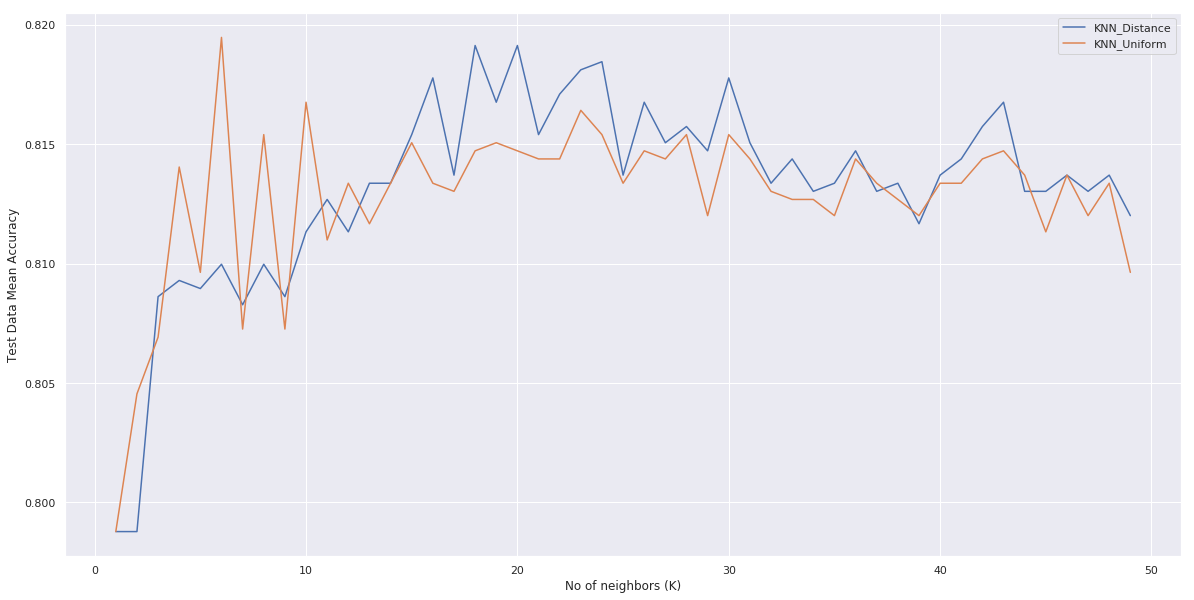

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20,10))
plt.plot(range(1,50),knn_distance)
plt.plot(range(1,50),knn_uniform)
plt.xlabel("No of neighbors (K)")
plt.ylabel("Test Data Mean Accuracy")
plt.legend(['KNN_Distance','KNN_Uniform'])
plt.show

In [0]:
from sklearn.tree import DecisionTreeClassifier

Clf= DecisionTreeClassifier(criterion='entropy')
Clf.fit(trainData,train_target)

ypred = Clf.predict(testData)
metric_report(test_target,ypred)
#plot_roc_curve(test_target,ypred)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       183
           1       0.82      0.68      0.74       170
           2       0.75      0.85      0.80       178
           3       0.70      0.65      0.67       185
           4       0.74      0.90      0.81       134
           5       0.56      0.50      0.53       149

    accuracy                           0.77       999
   macro avg       0.76      0.76      0.76       999
weighted avg       0.76      0.77      0.76       999

Confusion Matrix
[[183   0   0   0   0   0]
 [  3 116  51   0   0   0]
 [  0  26 152   0   0   0]
 [  0   0   0 120   9  56]
 [  0   0   0  11 120   3]
 [  0   0   0  41  33  75]]
Accuracy Score = 0.7667667667667668


# Support Vector Machine Classifier

In [0]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [65]:

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(6),scoring='accuracy')
np.random.seed(1)

rfecv.fit(trainData, train_target)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 347


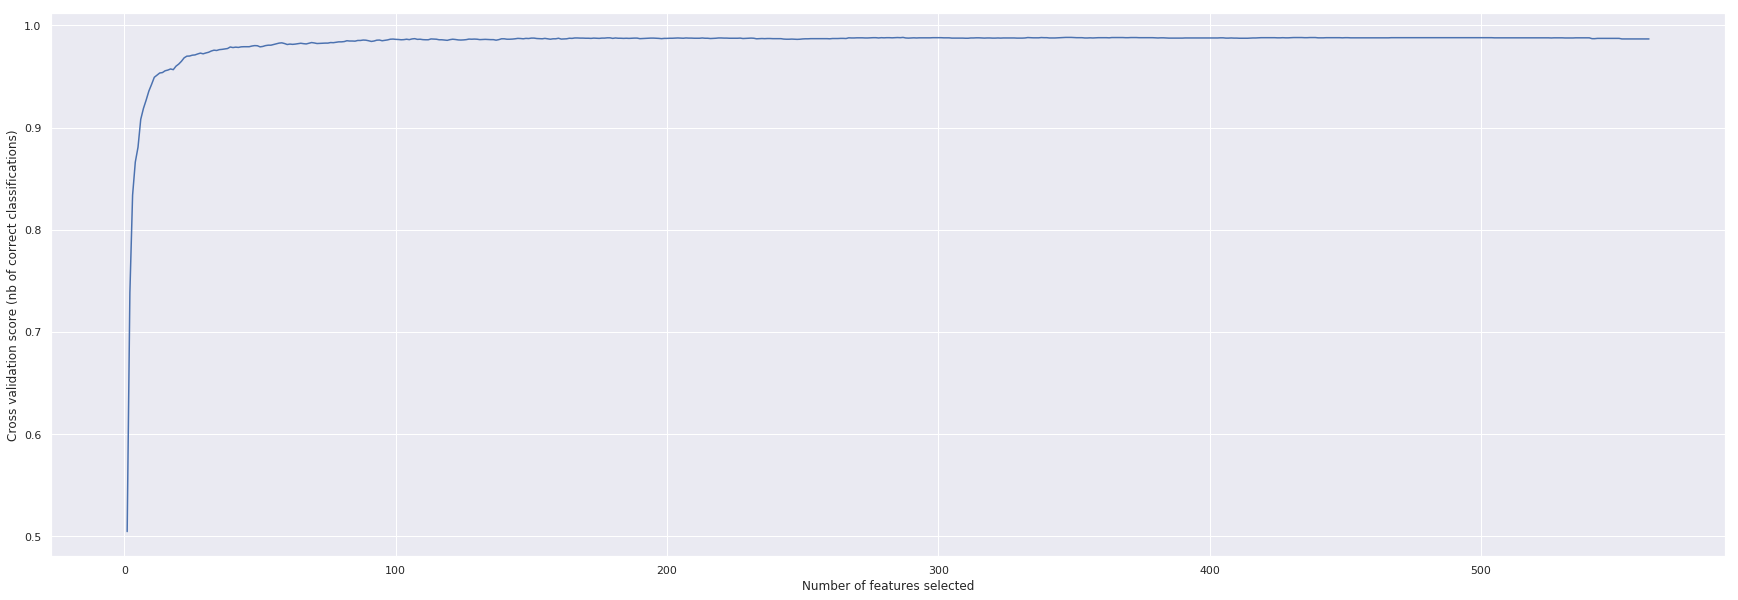

In [66]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(30,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [67]:
print('Accuracy of the SVM model on test data is ', rfecv.score(testData,testLabel) )
print('Ranking of features starting from the best estimated \n',rfecv.ranking_)
# if we mask the features to get only the best we get this
best_features = []
for ix,val in enumerate(rfecv.support_):
    if val==True:
        best_features.append(testData[:,ix])

Accuracy of the SVM model on test data is  0.0
Ranking of features starting from the best estimated 
 [  1  47   1   1   1  73   1   8   1   1   1   1   1   1   1   1   1 205
  20   1   4   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1 158   3   1 167  17   1   1   1   1   1   1
   1   1   1   1   1 134 121   1   1   1   1   1   1   1   1   1   1   1
   1   1   1  49   1  50   1  28 115   1  86  93   1   1  85  65   1   1
   1   1   1   1   1 106 196 183  71 126   1  41   1   1   1   1   1 169
   1   1   1   1   1   1   1   1  68   1   1   1   1   1  26  74  19   1
 108   1   1  18   1   1   1   1   1   1   1 118  78   1   1   1   1   1
  51   1   1   1   1   1   1   1   1   1   1   9   1   1   1   1   1   1
 116   1 102   1   1  97   1   1   1   1   1 119   1   1   5 214 203   1
  60   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1  64   1  91   1   1   1 110   1   1   1   1   1
   1  55   1  88   1  

In [68]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf', 'poly','sigmoid'],
              'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(gamma='auto'), parameters, scoring='accuracy') 
selector.fit(trainData, train_target)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.981 (+/-0.002) for {'C': 100, 'kernel': 'linear'}

0.990 (+/-0.001) for {'C': 100, 'kernel': 'rbf'}

0.989 (+/-0.004) for {'C': 100, 'kernel': 'poly'}

0.415 (+/-0.073) for {'C': 100, 'kernel': 'sigmoid'}

0.982 (+/-0.003) for {'C': 50, 'kernel': 'linear'}

0.989 (+/-0.001) for {'C': 50, 'kernel': 'rbf'}

0.988 (+/-0.002) for {'C': 50, 'kernel': 'poly'}

0.415 (+/-0.072) for {'C': 50, 'kernel': 'sigmoid'}

0.984 (+/-0.003) for {'C': 20, 'kernel': 'linear'}

0.986 (+/-0.004) for {'C': 20, 'kernel': 'rbf'}

0.987 (+/-0.003) for {'C': 20, 'kernel': 'poly'}

0.398 (+/-0.065) for {'C': 20, 'kernel': 'sigmoid'}

0.986 (+/-0.004) for {'C': 1, 'kernel': 'linear'}

0.940 (+/-0.002) for {'C': 1, 'kernel': 'rbf'}

0.942 (+/-0.009) for {'C': 1, 'kernel': 'poly'}

0.359 (+/-0.007) for {'C': 1, 'kernel': 'sigmoid'}

0.982 (+/-0.005) for {'C': 0.1, 'kernel': 'linear'}

0.820 (+/-0.013) for {'C': 0.1, 'kernel': 'rbf'}

0.793

In [69]:
clf = SVC(kernel='poly', C=100,gamma='auto').fit(trainData, train_target)
y_pred = clf.predict(testData)
print('Accuracy score:', accuracy_score(test_target, y_pred))

Accuracy score: 0.9443501866304717


# Applying supervised neural network using multi-layer preceptron 

In [0]:
import sklearn.neural_network as nn 
mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=2000 , alpha=1e-4  \
                        , solver='sgd' , verbose=10   \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)

In [0]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=2000, alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [0]:
#LBFGSis mostly used in regression related problems
mlpLBFGS =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=2000 , alpha=1e-4  \
                        , solver='lbfgs' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [73]:
nnModelSGD  = mlpSGD.fit(trainData , train_target)

Iteration 1, loss = 1.53895166
Iteration 2, loss = 0.98998533
Iteration 3, loss = 0.80356717
Iteration 4, loss = 0.69129433
Iteration 5, loss = 0.61246878
Iteration 6, loss = 0.55589776
Iteration 7, loss = 0.51166091
Iteration 8, loss = 0.47725982
Iteration 9, loss = 0.44795633
Iteration 10, loss = 0.42240720
Iteration 11, loss = 0.40177379
Iteration 12, loss = 0.38282779
Iteration 13, loss = 0.36790493
Iteration 14, loss = 0.35273386
Iteration 15, loss = 0.33867210
Iteration 16, loss = 0.32745779
Iteration 17, loss = 0.31714939
Iteration 18, loss = 0.30736475
Iteration 19, loss = 0.29860605
Iteration 20, loss = 0.28921414
Iteration 21, loss = 0.28240308
Iteration 22, loss = 0.27512448
Iteration 23, loss = 0.26772983
Iteration 24, loss = 0.26161158
Iteration 25, loss = 0.25641127
Iteration 26, loss = 0.25000309
Iteration 27, loss = 0.24518234
Iteration 28, loss = 0.23950197
Iteration 29, loss = 0.23440028
Iteration 30, loss = 0.23056885
Iteration 31, loss = 0.22603658
Iteration 32, los